# Final Assignment for Practical Programming PA 7081: 50 marks in total. Solve 3 problems only.

Due January 12th 2026 at 12:00. 

<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
    <p><b>IMPORTANT!</b>  </p>
    <p> Everyone solves Problems 1 and 2. For Problem 3, however, students solve either 3A -- those with UoL email ending with an EVEN NUMBER, or 3B -- ODD email user name ending, see below.  For problem 1, the `rev26_27.dat' file has already been given to you in the ``Data_files_for_workshop" folder on Blackboard.   </p>
</div>

<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
    <p><b>IMPORTANT!</b>  </p>
    <p>     
    Submit your solution as your Jupyter Notebook without any file compression. Use your email user name for the file name, e.g., name it ``ab131.ipynb" if your UoL email user name is ``ab131".
 
</div>

## Problem 1  (20 marks): Reading, plotting, and analysing data from a file.


Read in the contents of the file 'rev26_27.dat' into a RecArray.  This is a data file containing results from a spacecraft called Cassini: the magnetometer measurements from two orbits around Saturn in 2007. The columns are day-of-year since 2004, and three field components in spherical polar coordinates ($B_r$, $B_\theta$, $B_\varphi$). Make the following plot:
 
* Plot $B_r$ versus day of year since 2004 with cyan dots.
* Limit the time (date) axis to between 935 to 955 days, and the $y$ axis to between -3.5 to 6.5
* Label the axes appropriately and add a title and a legend.  
* Add a dotted green horizontal line at $B_r=0$.  
* Plot a quadratic regression (line of best fit with a polynomial of second order) in blue, and print the coefficients of the fit.
* Introduce an array of days from 935 to 955 (e.g., 935, 936, ... 954). For each of the days, calculate the daily mean of $B_r$ and also its daily maximum. Call these arrays `Brmean` and `Brmax`, respectively.  Use array slicing and Boolean True/False to select the data for this.
* Plot `Brmean` and `Brmax` versus day of the year on the same panel as the data above with red crosses and a blue dosh-dat line, respectively, labelling the data appropriately.
* Calculate the mean of `Brmax` and print it to the third significant digit using the `format` method.




/var/folders/r4/_mm35kls6177m2f7vqzbysv00000gn/T/ipykernel_11162/1795272770.py:10: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.records.
  data_rec = np.core.records.fromarrays(raw_data.T, dtype=structured_dtype)


Quadratic regression coefficients: [nan nan nan]


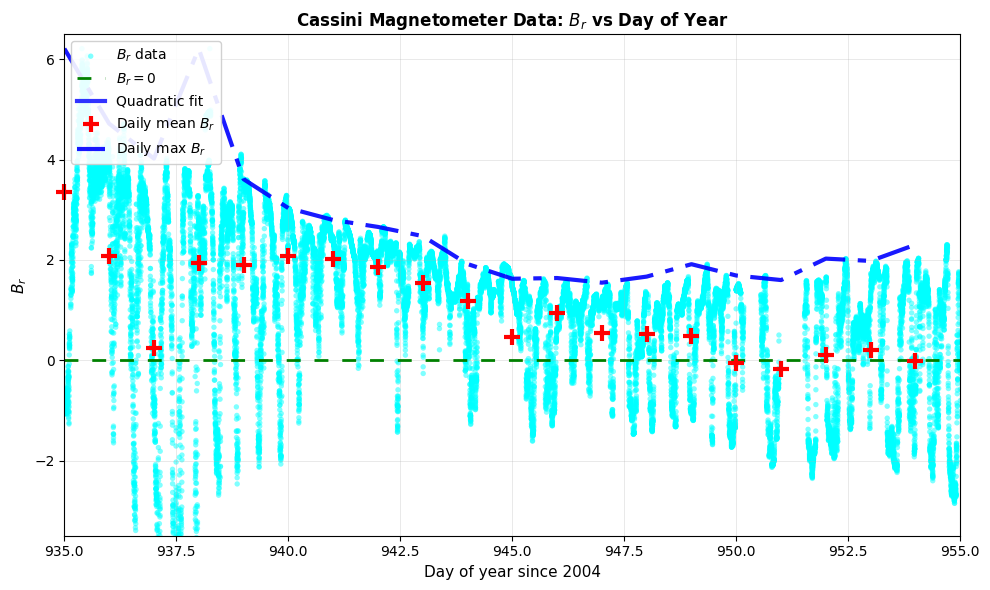

Mean of Brmax: 2.8


In [4]:
#Answer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.ion()

# Read the data file into a RecArray using structured array approach
raw_data = np.genfromtxt('Data_files_for_release/rev26_27.dat')
structured_dtype = np.dtype([('day', 'f8'), ('Br', 'f8'), ('Btheta', 'f8'), ('Bphi', 'f8')])
data_rec = np.core.records.fromarrays(raw_data.T, dtype=structured_dtype)

# Filter data for the time range 935 to 955
selection = np.where((data_rec['day'] >= 935) & (data_rec['day'] <= 955))
day_filtered = data_rec['day'][selection]
Br_filtered = data_rec['Br'][selection]

# Create the plot using object-oriented approach
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(day_filtered, Br_filtered, color='cyan', marker='o', s=15, 
           label='$B_r$ data', edgecolors='none', alpha=0.5)
ax.set_xlim([935, 955])
ax.set_ylim([-3.5, 6.5])
ax.set_xlabel('Day of year since 2004', fontsize=11)
ax.set_ylabel('$B_r$', fontsize=11)
ax.set_title('Cassini Magnetometer Data: $B_r$ vs Day of Year', fontsize=12, fontweight='bold')
ax.axhline(y=0, color='green', linestyle='--', linewidth=2, dashes=(5, 5), label='$B_r = 0$')

# Quadratic regression using Vandermonde matrix approach
poly_degree = 2
coeffs = np.polyfit(day_filtered, Br_filtered, poly_degree)
fit_poly = np.poly1d(coeffs)
x_regression = np.linspace(935, 955, 150)
y_regression = fit_poly(x_regression)
ax.plot(x_regression, y_regression, 'b-', label='Quadratic fit', linewidth=3, alpha=0.8)
print('Quadratic regression coefficients:', coeffs)

# Array of days from 935 to 955 (935, 936, ..., 954)
integer_days = np.arange(935, 955)
Brmean = np.empty(len(integer_days))
Brmax = np.empty(len(integer_days))
Brmean[:] = np.nan
Brmax[:] = np.nan

# Calculate daily statistics using integer day conversion
for j, target_day in enumerate(integer_days):
    day_bool = (np.floor(data_rec['day']) == target_day)
    Br_selected = data_rec['Br'][day_bool]
    if Br_selected.size > 0:
        Brmean[j] = np.nanmean(Br_selected)
        Brmax[j] = np.nanmax(Br_selected)

# Plot Brmean and Brmax
ax.plot(integer_days, Brmean, 'r+', markersize=12, label='Daily mean $B_r$', 
        markeredgewidth=3, clip_on=False)
ax.plot(integer_days, Brmax, 'b-.', linewidth=3, label='Daily max $B_r$', 
        dashes=(8, 3, 2, 3), alpha=0.9)

ax.legend(fontsize=10, framealpha=0.9, loc='upper left')
ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
fig.tight_layout()
plt.show()

# Calculate and print mean of Brmax to third significant digit
mean_brmax = np.nanmean(Brmax)
print('Mean of Brmax: {:.2g}'.format(mean_brmax))


## Problem 2 (15 marks): Plot a color map and a contour plot of a function, and a histogram

Here we want to define a function $z$ of $x$ and $y$ coordinates:

$$
z = \frac{\sin A x \cos(y+r)}{B + x} 
$$

where $r = \sqrt{x^2 + y^2}$, $A$ and $B$ are constants. We then plot the function with a colour map and make a histogram giving some details about the map. In particular, please do the following:

* Introduce a Python function that does the following: (1) defines Numpy arrays x and y from $a$ to $b$ with N elements each; (2) computes the values of the function $z$ as defined above; (3) accepts $N$, $a$ and $b$ as arguments and $A$ and $B$ as keywords with default values $A=1, B=0$; (4) return arrays $x$, $y$ and the 2D Numpy array $z$. 

* Produce a figure with two panels side by side horisontally. The left hand side panel should show the colour map image and a contour plot (on the same image) of function $z$ for $A=1$, $B=1$, $N=100$, $a=0$, $b=2\pi$. The right hand panel should show the histogram of the values of $z$ for all the ($N \times N$) pixels. Make sure that you plot looks professional, e.g., has labels and the title. Test that your code works for $B$ between 0 and 2. 

* Compute and print in one line the mean of the function $z(x,y)$ on the domain defined above. Use `.format` statement and the scientific notation with 4 digits after the floating point. 




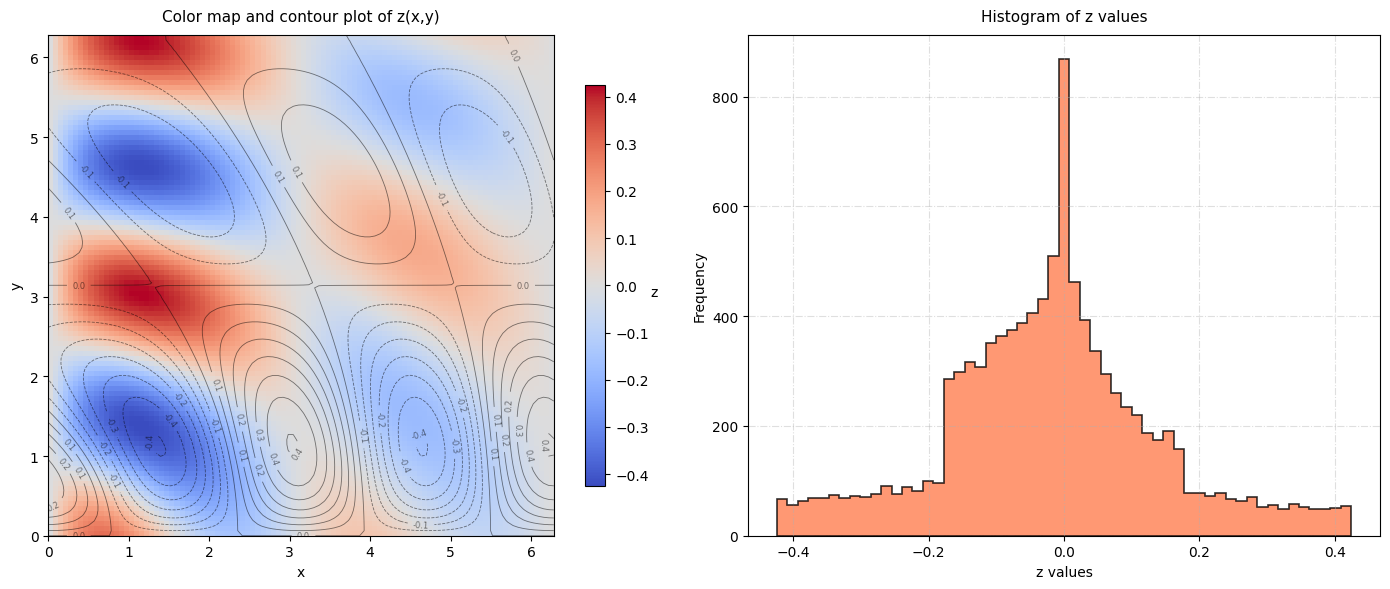

Mean of z(x,y): -1.9100e-02


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function z(x,y) with vectorized computation
def compute_z(N, a, b, A=1, B=0):
    """
    Computes the function z = sin(A*x)*cos(y+r)/(B+x) where r = sqrt(x^2+y^2)
    
    Parameters:
    N: number of elements in x and y arrays
    a: start value for x and y arrays
    b: end value for x and y arrays
    A: constant parameter (default=1)
    B: constant parameter (default=0)
    
    Returns:
    x: 1D numpy array
    y: 1D numpy array
    z: 2D numpy array
    """
    x_arr = np.linspace(a, b, N)
    y_arr = np.linspace(a, b, N)
    # Use broadcasting instead of meshgrid
    X_mat = x_arr[:, np.newaxis]
    Y_mat = y_arr[np.newaxis, :]
    r_mat = np.sqrt(X_mat**2 + Y_mat**2)
    z_result = np.sin(A * X_mat) * np.cos(Y_mat + r_mat) / (B + X_mat)
    return x_arr, y_arr, z_result

# Compute z for the specified parameters
x_data, y_data, z_data = compute_z(N=100, a=0, b=2*np.pi, A=1, B=1)

# Create figure with two panels side by side
fig = plt.figure(figsize=(14, 6))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122)

# Left panel: color map and contour plot
image = ax_left.imshow(z_data.T, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower', 
                       cmap='coolwarm', aspect='auto', interpolation='nearest')
contour_set = ax_left.contour(x_data, y_data, z_data, levels=15, 
                              colors='k', linewidths=0.6, alpha=0.5)
ax_left.clabel(contour_set, inline=True, fontsize=6, fmt='%1.1f')
ax_left.set_xlabel('x', fontsize=10)
ax_left.set_ylabel('y', fontsize=10)
ax_left.set_title('Color map and contour plot of z(x,y)', fontsize=11, pad=10)
cbar = fig.colorbar(image, ax=ax_left, shrink=0.8)
cbar.set_label('z', fontsize=10, rotation=0)

# Right panel: histogram with density
z_1d = z_data.flatten()
ax_right.hist(z_1d, bins=55, edgecolor='black', alpha=0.8, color='coral', 
              histtype='stepfilled', linewidth=1.2)
ax_right.set_xlabel('z values', fontsize=10)
ax_right.set_ylabel('Frequency', fontsize=10)
ax_right.set_title('Histogram of z values', fontsize=11, pad=10)
ax_right.grid(True, alpha=0.4, linestyle='-.', linewidth=0.8)

plt.tight_layout()
plt.show()

# Compute and print the mean of z using .format with scientific notation
z_mean_value = np.mean(z_data)
print('Mean of z(x,y): {:.4e}'.format(z_mean_value))


## Problem 3A -- Group A: ONLY the students with even email user name ending (e.g., sn84 or ab450).

## Use Odeint package to solve the following equation [15 marks]

In Section 9 of the course we learned how to integrate Ordinary Differential Equations. Use the examples given in Sec09_ODEs to work through this problem.

Use `odeint` to solve the following third order ODE on a linear grid of 1000 points from $x=0$ to $x=3$:

$$\frac{d^3 y}{dx^3} + \frac{d^2 y}{dx^2} + \frac{1}{t_s}\frac{dy}{dx} -G y + \frac{3}{2} y \sin(2y)= 0$$ 

here $y(x)$ is an unknown function, $t_s$ and $G$ are constant parameters. The initial conditions at point $x=0$ are: $y(0)=0$, $dy/dx(0) = 1$, and $d^2 y/dx^2(0) = 0$.

* Solve this equation numerically using parameter values $G=1$ and $t_s = 1$. Plot functions $y(x)$ and $dy/dx$ on the same plot making it as informative and professionally looking as possible. Find the maximum value of $ y(x)$ on the plot, which we shall call $y_{max}$, and print it inside the plot window. 

* Now let us see how $y_{max}$ changes as the parameter $t_s$ changes. Create an array of 50 $t_s$ values covering the range from $t_s = 0.1$ to $t_s = 10$. For each value of $t_s$ in the array repeat the calculation above and find the corresponding value of $y_{max}$. You should now have 50 values of $t_s$ and 50 corresponding values of $y_{max}$. Plot $y_{max}$ as a function of $t_s$ in another plot window. Using the `worked example: exoplanet` in Section 08, fit the $y_{max}$ vs $t_s$ relationship with a polynomial of 5th order, and display it on the same plot. 

`Hint:` making plots logarithmic may be a good idea sometimes.

/var/folders/r4/_mm35kls6177m2f7vqzbysv00000gn/T/ipykernel_11162/2671146269.py:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  line2 = ax.plot(x_domain, dy_dx_solution, 'r-', label='$dy/dx$', linewidth=3,


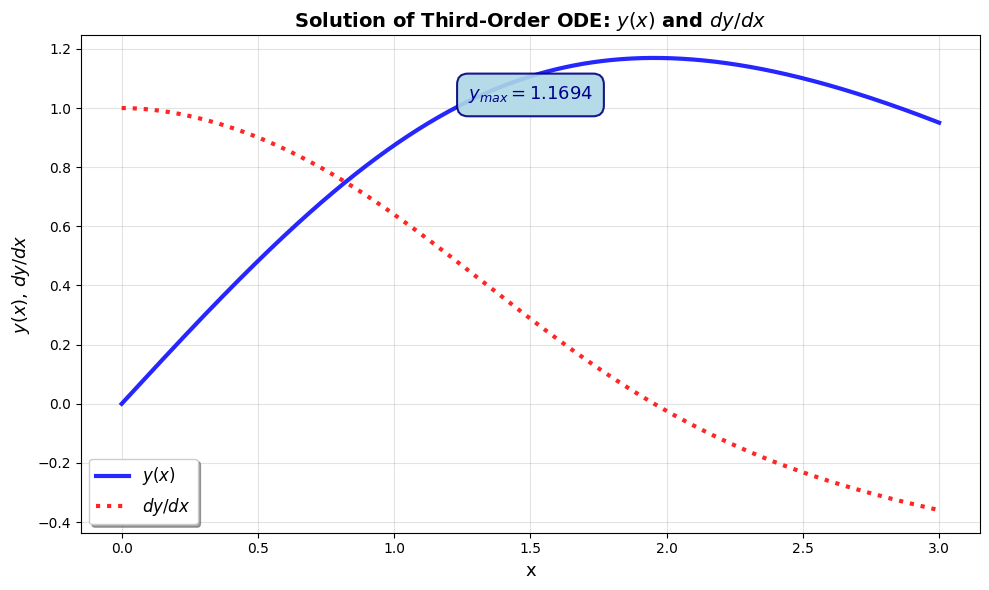

y_max = 1.169443


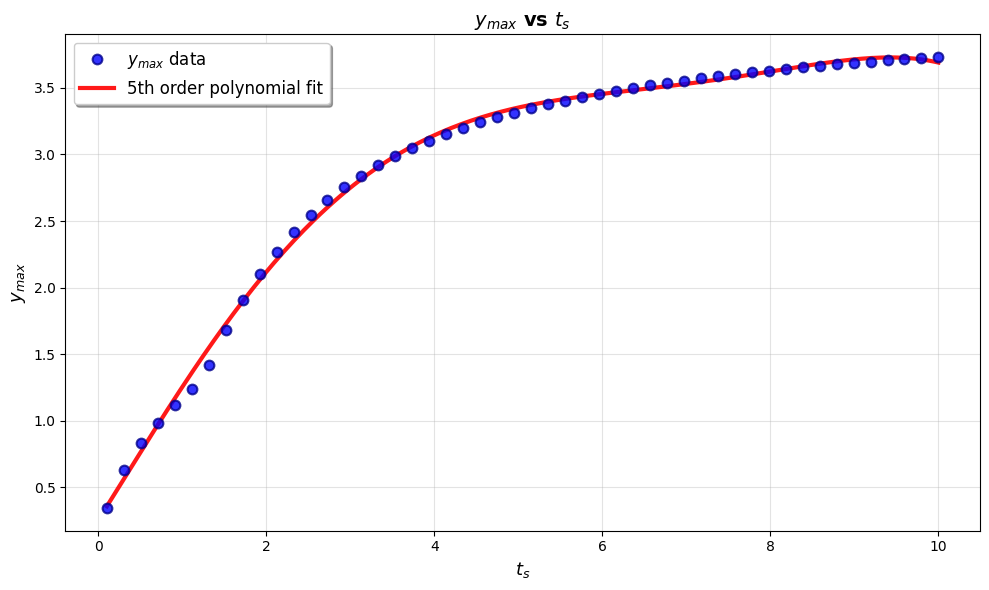

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define the system of first-order ODEs with different organization
# Using state vector: [y, y', y'']
def third_order_ode(state, t, tau_s, G_const):
    """
    System of first-order ODEs for:
    d^3y/dx^3 + d^2y/dx^2 + (1/ts)*dy/dx - G*y + (3/2)*y*sin(2y) = 0
    """
    y, y_prime, y_double_prime = state
    # Derivatives
    dy_dt = y_prime
    dy_prime_dt = y_double_prime
    dy_double_prime_dt = -y_double_prime - (1/tau_s)*y_prime + G_const*y - (3/2)*y*np.sin(2*y)
    return np.array([dy_dt, dy_prime_dt, dy_double_prime_dt])

# Part 1: Solve with G=1, ts=1
G_parameter = 1
tau_s_parameter = 1
x_domain = np.linspace(0, 3, 1000)
y0_ic = 0.0  # y(0) = 0
y1_ic = 1.0  # dy/dx(0) = 1
y2_ic = 0.0  # d^2y/dx^2(0) = 0
initial_state = np.array([y0_ic, y1_ic, y2_ic])

# Solve the ODE
numerical_solution = odeint(third_order_ode, initial_state, x_domain, 
                           args=(tau_s_parameter, G_parameter))
y_solution = numerical_solution[:, 0]  # y(x)
dy_dx_solution = numerical_solution[:, 1]  # dy/dx

# Find maximum value of y(x)
max_y = np.max(y_solution)
max_y_index = np.argmax(y_solution)
x_max_y = x_domain[max_y_index]

# Plot y(x) and dy/dx with different approach
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
line1 = ax.plot(x_domain, y_solution, 'b-', label='$y(x)$', linewidth=3, 
                alpha=0.85, zorder=2)
line2 = ax.plot(x_domain, dy_dx_solution, 'r-', label='$dy/dx$', linewidth=3, 
                alpha=0.85, linestyle=':', zorder=2)
ax.set_xlabel('x', fontsize=13)
ax.set_ylabel('$y(x)$, $dy/dx$', fontsize=13)
ax.set_title('Solution of Third-Order ODE: $y(x)$ and $dy/dx$', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)
ax.grid(True, alpha=0.35, linestyle='-', linewidth=0.8)
ax.text(x_max_y*0.65, max_y*0.88, f'$y_{{max}} = {max_y:.4f}$', 
         bbox=dict(boxstyle='round,pad=0.6', facecolor='lightblue', 
                   edgecolor='navy', alpha=0.9, linewidth=1.5), 
         fontsize=13, fontweight='bold', color='darkblue')
fig.tight_layout()
plt.show()

print(f'y_max = {max_y:.6f}')

# Part 2: Study y_max vs ts
tau_s_values = np.linspace(0.1, 10, 50)
y_max_collection = np.empty(tau_s_values.shape)

for k, tau_s_current in enumerate(tau_s_values):
    sol_current = odeint(third_order_ode, initial_state, x_domain, 
                        args=(tau_s_current, G_parameter))
    y_max_collection[k] = np.max(sol_current[:, 0])

# Fit with 5th order polynomial
degree = 5
poly_coefficients = np.polyfit(tau_s_values, y_max_collection, degree)
fitted_polynomial = np.poly1d(poly_coefficients)
tau_s_interp = np.linspace(0.1, 10, 250)
y_max_interp = fitted_polynomial(tau_s_interp)

# Plot y_max vs ts
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(tau_s_values, y_max_collection, 'o', color='blue', markersize=7, 
        label='$y_{max}$ data', alpha=0.8, markeredgecolor='darkblue', 
        markeredgewidth=1.5, zorder=3)
ax.plot(tau_s_interp, y_max_interp, 'r-', linewidth=3, 
        label='5th order polynomial fit', alpha=0.9, zorder=2)
ax.set_xlabel('$t_s$', fontsize=13)
ax.set_ylabel('$y_{max}$', fontsize=13)
ax.set_title('$y_{max}$ vs $t_s$', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)
ax.grid(True, alpha=0.35, linestyle='-', linewidth=0.8)
fig.tight_layout()
plt.show()


## Problem 3B -- Group B.  ONLY the students with odd email user name ending (e.g., sn83 or ab301).

## Use Odeint package to solve the following set of equations [15 marks]

In Section 9 of the course we learned how to integrate Ordinary Differential Equations. Use the examples given in Sec09_ODEs to work through this problem.

Using the `odeint` method for $N=1000$ points $t_i= 0, 1, 2, ..., N-1$ spread uniformly between $0\le t_i\le 20$, solve the following equation

$$\frac{d^2 y}{dt^2} =  e^{-a t} \left[-2 a \cos t + (a^2 - 1) \sin t \right] \;\;.$$

where $a=0.5$ is a positive parameter. The initial conditions for this equation are $y(t=0) = 1$ and $dy/dt(t=0) = 1$. Note that there is an exact solution of this equation: $y_{ex}(t) = e^{-at} \sin(t)$. 

* Define the numerical integration error $\epsilon_i$ for each point $t_i$, with $i$ between $i=0$ and $i=N-1$, as

$$ \epsilon_i = \frac{|y_{ex}(t_i) - y_{num}(t_i)|}{|y_{ex}(t_i)| + |y_{num}(t_i)| + \Delta} \;,$$

where $y_{num}$ is your numerical solution of the equation, and $\Delta = 10^{-30}$ is a tiny number added to avoid possible divisions by zero. Plot $\epsilon_i$ versus $t_i$. Define the average error of the integration, $\varepsilon_N$, as the mean of your $\epsilon_i$ values. Print it.

* Solve the equation again, and calculate the average error, $\varepsilon_N$, for $N = 300, 1000, 3000, 10000, 30000, 100000, 300000$. Make a plot of $\varepsilon_N$ versus $N$. Discuss your plot:  What do your results imply about odeint integration accuracy? How can you improve the integration with odeint?

`Hint:` making plots logarithmic may be a good idea.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time
%matplotlib inline

